# CVPR Project - Part III: Blurry Template Matching with SIFT 

## Multi Model Multi Template Fitting

Iva Ilcheva<br>
Reinard Lazuardi Kuwandy

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy import spatial
%matplotlib inline

IMG_TARGET = 'img/target-chocolates.jpg'
IMG_TEMPLATE = [
    'img/au-lait.jpg',
    'img/choco-noisettes.jpg', 
    'img/cremant.jpg',
    'img/gianduja.png',
    'img/noir-amarante.jpg',
    'img/noir-coco.jpg',
    'img/noir-gingembre.jpg', 
    'img/noir-orange.jpg'
]

### Helper Functions

In [2]:
from utils import *

## Preparation

In [3]:
def apply_gaussian_blur(img, filter_matrix):
    return cv.GaussianBlur(img, filter_matrix, 0)

In [4]:
def apply_averaging_blur(img, filter_matrix):
    return cv.blur(img,filter_matrix)

## Implementation

## GAUSSIAN BLUR ##

In [127]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [128]:
img_template = apply_gaussian_blur(img_template,(15,15))

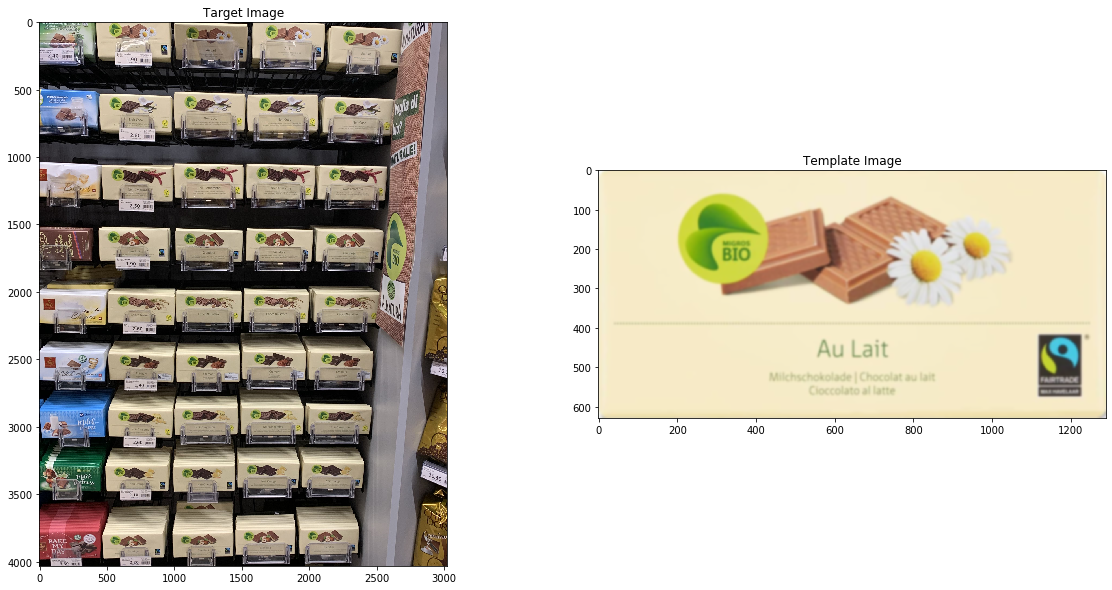

In [129]:
plot_images(img_target, img_template)

In [130]:
keypoints_target, descriptors_target, keypoints_template, descriptors_template = sift_keypoints_and_descriptors(img_target, img_template)

In [131]:
plot_best_matches, best_matches = get_best_matches(descriptors_target, descriptors_template, ratio=0.45)

In [133]:
correspondences = get_correspondences(best_matches, keypoints_target, keypoints_template)

In [134]:
len(correspondences)

314

In [136]:
models = sequential_msac(correspondences, 1, 4,99,2500, 0.8)

298
283
264
250


In [139]:
PS = get_preference_sets(correspondences, models)

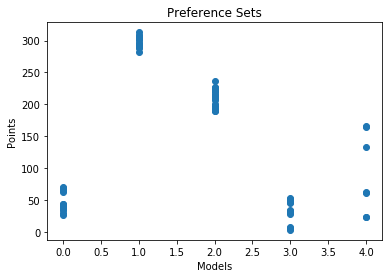

In [141]:
plot_scatter(PS)

In [142]:
cl = j_linkage(PS)

In [143]:
mod = remove_pref_set(cl)

In [144]:
mods = remove_pref_set(models)

In [146]:
mod = get_model(cl,correspondences)

In [147]:
new_mod = delete_small_model(mod, 4)

In [149]:
clusters_, clusters_size_list = define_clusters(new_mod)
clusters_size = len(clusters_)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list, clusters_)))

new_test_model = remove_far_distances_clusters(clusters_, new_mod,100)

print("Num of clusters previously: {}".format(len(new_mod)))

clusters_new, clusters_size_list_new = define_clusters(new_test_model)
clusters_new, new_test_model = merge_cluster(clusters_new, new_test_model)
clusters_new, clusters_size_list_new = define_clusters(new_test_model)

print("Num of clusters currently: {}".format(len(new_test_model)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new, clusters_new)))

Previous dunn index of the cluster : 0.0016866420606162517
Num of clusters previously: 6
Num of clusters currently: 2
Current dunn index of the cluster : 0.0370529506513545


In [150]:
img_target, img_template2 = read_images(IMG_TARGET, IMG_TEMPLATE[1])

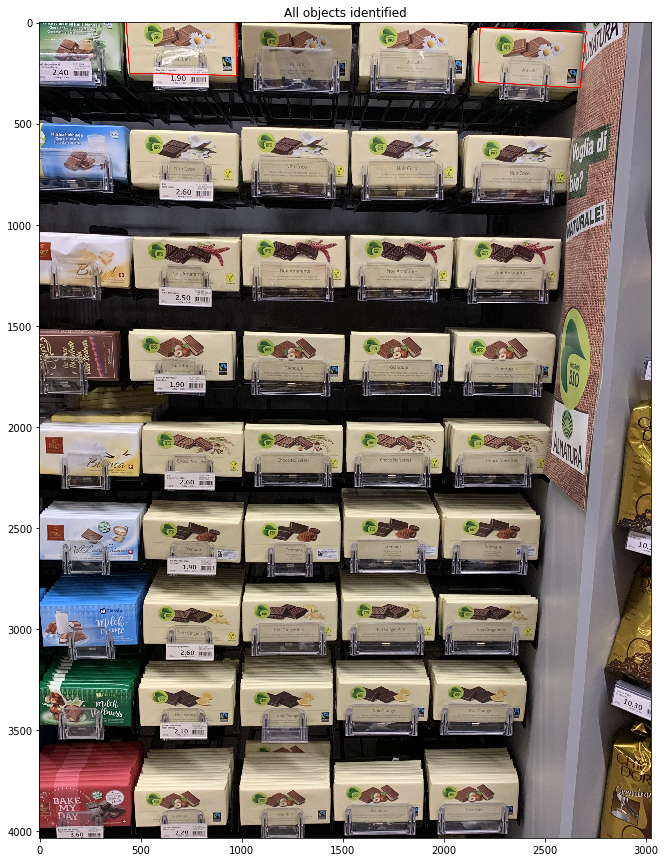

In [151]:
draw_bounding_boxes(img_target, img_template, new_test_model, 1, True, color=(3, 3, 252))

### Blur Target Image

In [5]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [6]:
img_target = apply_gaussian_blur(img_target,(5,5))

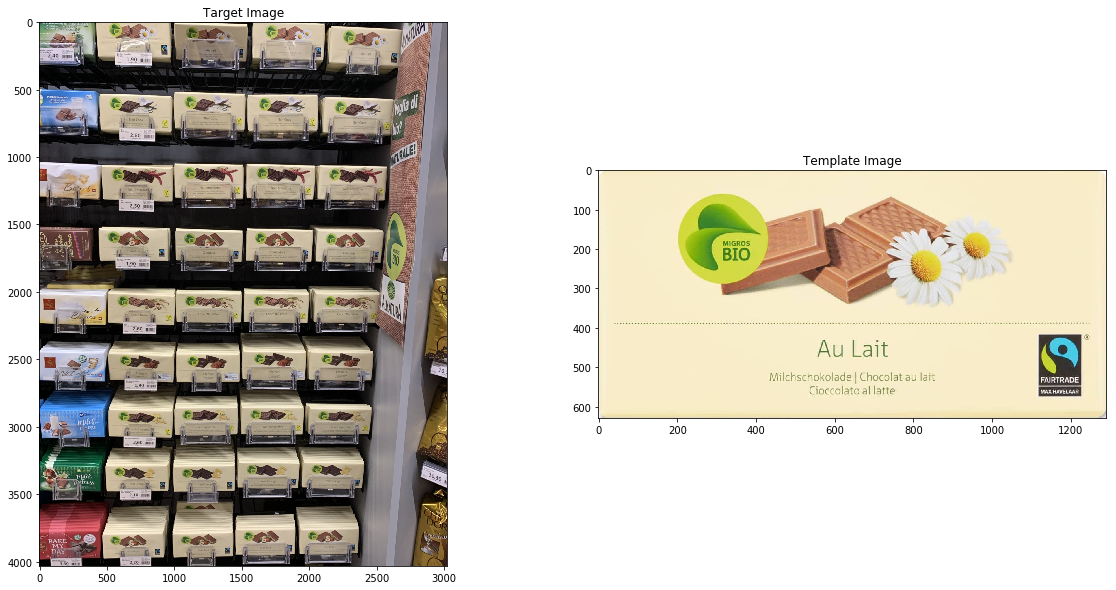

In [7]:
plot_images(img_target, img_template)

In [8]:
keypoints_target, descriptors_target, keypoints_template, descriptors_template = sift_keypoints_and_descriptors(img_target, img_template)

In [9]:
plot_best_matches, best_matches = get_best_matches(descriptors_target, descriptors_template, ratio=0.45)

In [10]:
correspondences = get_correspondences(best_matches, keypoints_target, keypoints_template)

In [11]:
len(correspondences)

129

In [12]:
models = sequential_msac(correspondences, 1, 4,99,2500, 0.8)

/Users/reinardlazuardikuwandy/Documents/USI/Semester 4/CVPR/Project/utils.py:128: RuntimeWarning: divide by zero encountered in true_divide
  estimatedPPrime = estimatedPPrime/estimatedPPrime[2]
/Users/reinardlazuardikuwandy/Documents/USI/Semester 4/CVPR/Project/utils.py:128: RuntimeWarning: invalid value encountered in true_divide
  estimatedPPrime = estimatedPPrime/estimatedPPrime[2]


116
102
95
89
83
78
73
69
65
60
56
51
47
43
39
35
31
27
23
19
15
11
8


In [36]:
PS = get_preference_sets(correspondences, models)

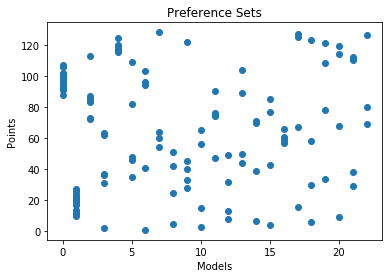

In [37]:
plot_scatter(PS)

In [38]:
cl = j_linkage(PS)

In [39]:
mod = remove_pref_set(cl)

In [40]:
mod = get_model(cl,correspondences)

In [41]:
new_mod = delete_small_model(mod, 4)

In [42]:
clusters_, clusters_size_list = define_clusters(new_mod)
clusters_size = len(clusters_)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list, clusters_)))

new_test_model = remove_far_distances_clusters(clusters_, new_mod,100)

print("Num of clusters previously: {}".format(len(new_mod)))

clusters_new, clusters_size_list_new = define_clusters(new_test_model)
clusters_new, new_test_model = merge_cluster(clusters_new, new_test_model)
clusters_new, clusters_size_list_new = define_clusters(new_test_model)

print("Num of clusters currently: {}".format(len(new_test_model)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new, clusters_new)))

Previous dunn index of the cluster : 0.0012128128372062585
Num of clusters previously: 10
Num of clusters currently: 4
Current dunn index of the cluster : 0.004983048131707927


In [43]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [44]:
img_target = apply_gaussian_blur(img_target,(5,5))

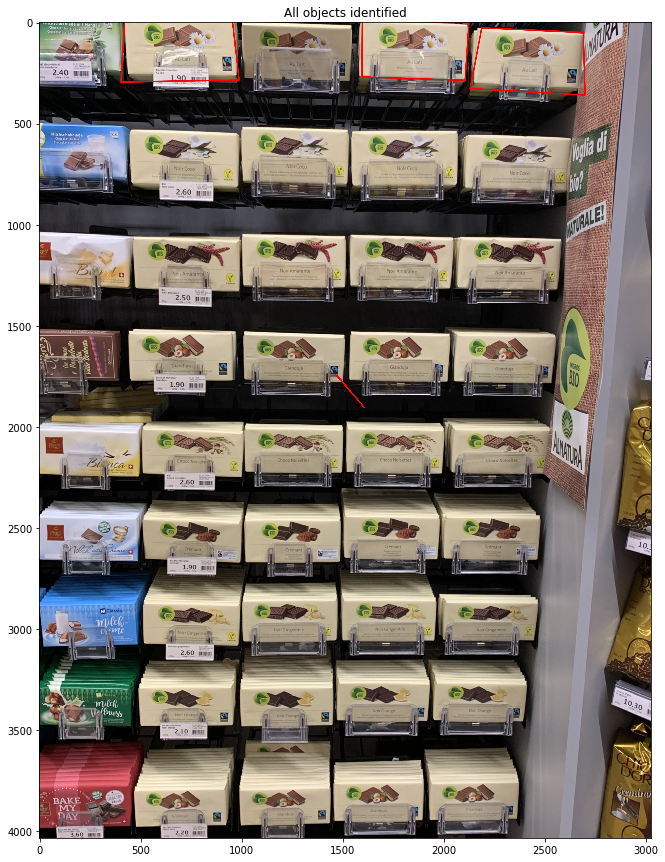

In [45]:
draw_bounding_boxes(img_target, img_template, new_test_model, 1, True, color=(3, 3, 252))

#### Kernel 15 x 15

In [53]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [55]:
img_target = apply_gaussian_blur(img_target,(15,15))

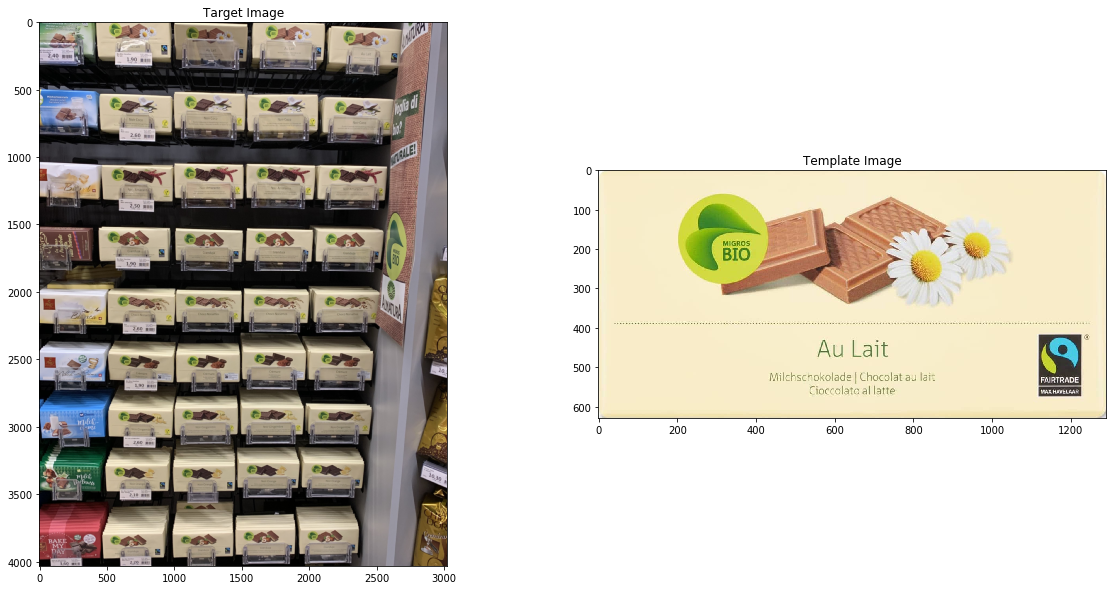

In [56]:
plot_images(img_target, img_template)

In [57]:
keypoints_target, descriptors_target, keypoints_template, descriptors_template = sift_keypoints_and_descriptors(img_target, img_template)

In [58]:
plot_best_matches, best_matches = get_best_matches(descriptors_target, descriptors_template, ratio=0.45)

In [59]:
correspondences = get_correspondences(best_matches, keypoints_target, keypoints_template)

In [60]:
len(correspondences)

51

In [61]:
models = sequential_msac(correspondences, 1, 4,99,2500, 0.8)

45
39
34
30
26
22
18
14
13
12
11
10
9
8
7
6


In [62]:
PS = get_preference_sets(correspondences, models)

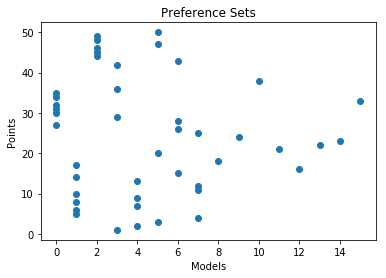

In [63]:
plot_scatter(PS)

In [64]:
cl = j_linkage(PS)

In [65]:
mod = remove_pref_set(cl)

In [66]:
mod = get_model(cl,correspondences)

In [67]:
new_mod = delete_small_model(mod, 4)

In [68]:
clusters_, clusters_size_list = define_clusters(new_mod)
clusters_size = len(clusters_)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list, clusters_)))

new_test_model = remove_far_distances_clusters(clusters_, new_mod,100)

print("Num of clusters previously: {}".format(len(new_mod)))

clusters_new, clusters_size_list_new = define_clusters(new_test_model)
clusters_new, new_test_model = merge_cluster(clusters_new, new_test_model)
clusters_new, clusters_size_list_new = define_clusters(new_test_model)

print("Num of clusters currently: {}".format(len(new_test_model)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new, clusters_new)))

Previous dunn index of the cluster : 0.0015718817422847096
Num of clusters previously: 4
Num of clusters currently: 2
Current dunn index of the cluster : 0.018349030138661057


In [69]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [70]:
img_target = apply_gaussian_blur(img_target,(5,5))

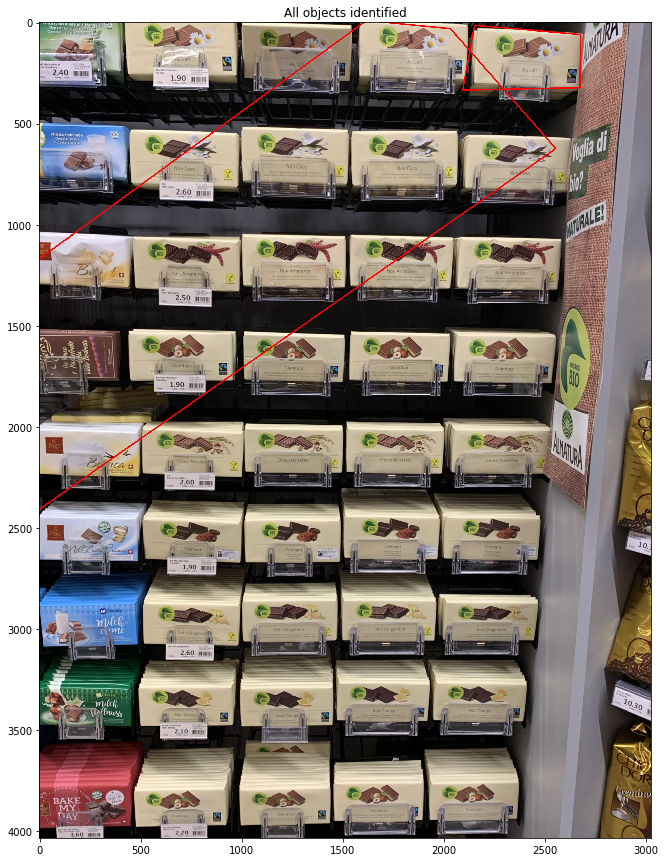

In [71]:
draw_bounding_boxes(img_target, img_template, new_test_model, 1, True, color=(3, 3, 252))

## AVERAGING

In [152]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [153]:
img_template = apply_averaging_blur(img_template,(15,15))

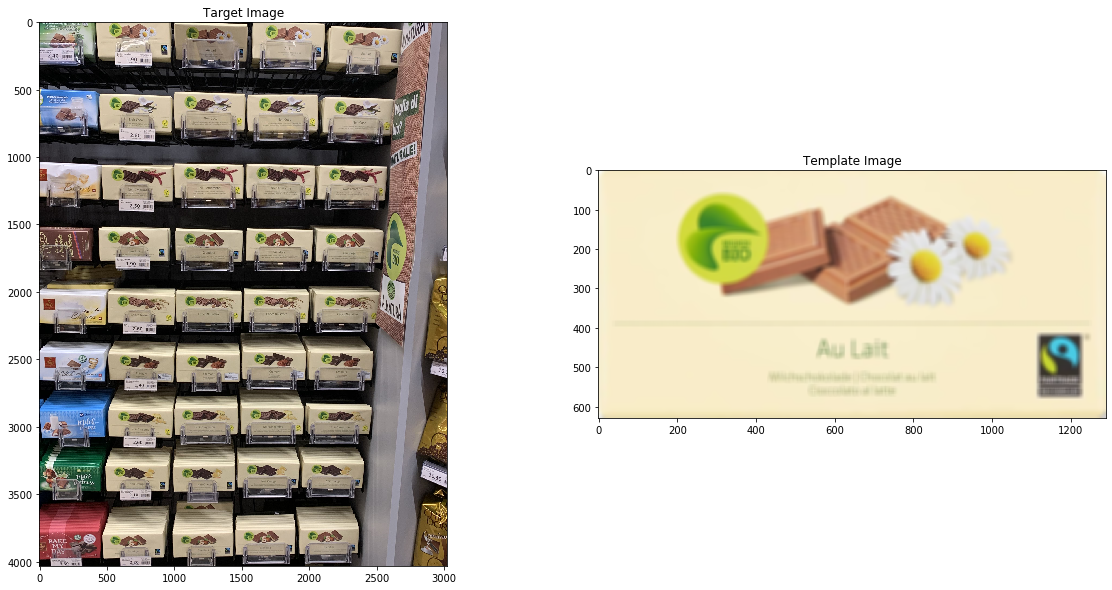

In [154]:
plot_images(img_target, img_template)

In [155]:
keypoints_target, descriptors_target, keypoints_template2, descriptors_template2 = sift_keypoints_and_descriptors(img_target, img_template)

In [156]:
plot_best_matches2, best_matches2 = get_best_matches(descriptors_target, descriptors_template2, ratio=0.45)

In [158]:
correspondences2 = get_correspondences(best_matches2, keypoints_target, keypoints_template2)

In [159]:
len(correspondences2)

97

In [160]:
models2 = sequential_msac(correspondences2, 1, 4,99,2500, 0.8)

91
86
81
76
72
68
64
60
56
52
48
44
40
36
32
28
24
20
16
12
8
5
2


In [163]:
PS2 = get_preference_sets(correspondences2, models2)

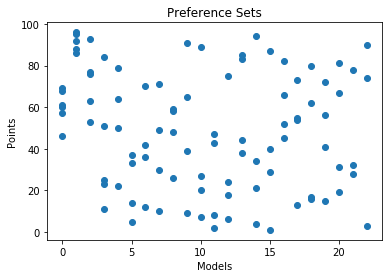

In [164]:
plot_scatter(PS2)

In [165]:
cl2 = j_linkage(PS2)

In [166]:
mod2 = remove_pref_set(cl2)

In [167]:
mod2 = get_model(cl2,correspondences2)

In [168]:
new_mod2 = delete_small_model(mod2, 4)

In [169]:
clusters_2, clusters_size_list2 = define_clusters(new_mod2)
clusters_size2 = len(clusters_2)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list2, clusters_2)))

new_test_model2 = remove_far_distances_clusters(clusters_2, new_mod2,100)

print("Num of clusters previously: {}".format(len(new_mod2)))

clusters_new2, clusters_size_list_new2 = define_clusters(new_test_model2)
clusters_new2, new_test_model2 = merge_cluster(clusters_new2, new_test_model2)
clusters_new2, clusters_size_list_new2 = define_clusters(new_test_model2)

print("Num of clusters currently: {}".format(len(new_test_model2)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new2, clusters_new2)))

Previous dunn index of the cluster : 0.001489802197906221
Num of clusters previously: 4
Num of clusters currently: 1
Current dunn index of the cluster : 0.014103516175205721


In [170]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

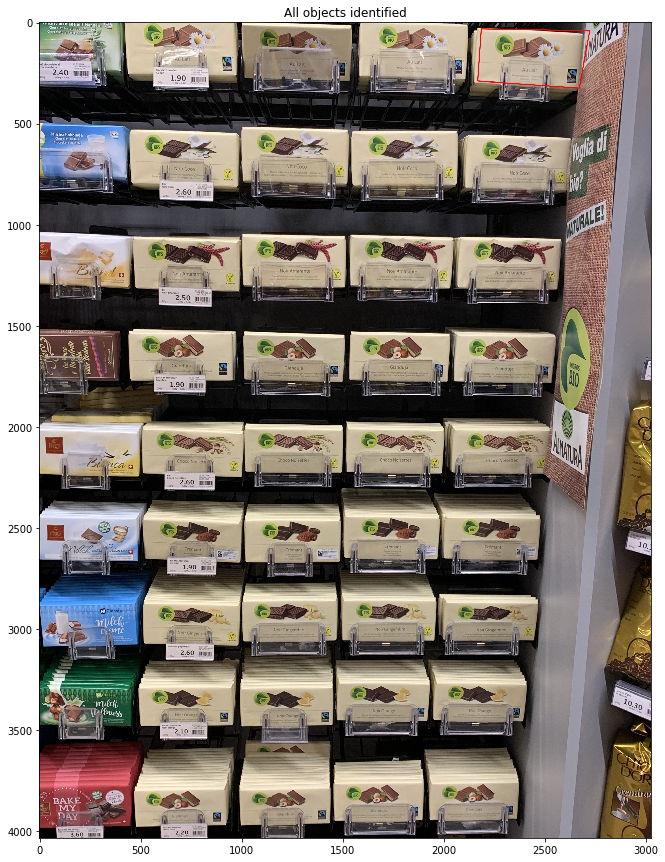

In [171]:
draw_bounding_boxes(img_target, img_template, new_test_model2, 1, True, color=(3, 3, 252))

### Blur Target Image

In [72]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [73]:
img_target = apply_averaging_blur(img_target,(5,5))

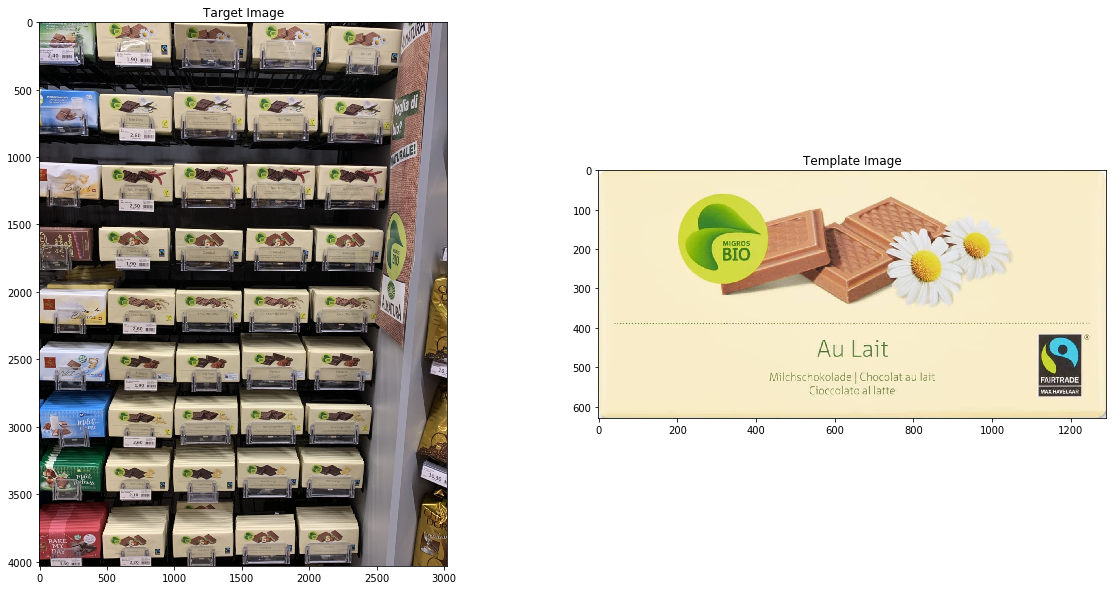

In [74]:
plot_images(img_target, img_template)

In [75]:
keypoints_target, descriptors_target, keypoints_template2, descriptors_template2 = sift_keypoints_and_descriptors(img_target, img_template)

In [76]:
plot_best_matches2, best_matches2 = get_best_matches(descriptors_target, descriptors_template2, ratio=0.45)

In [77]:
correspondences2 = get_correspondences(best_matches2, keypoints_target, keypoints_template2)

In [78]:
len(correspondences2)

89

In [79]:
models2 = sequential_msac(correspondences2, 1, 4,99,2500, 0.8)

81
75
70
65
61
57
53
49
45
41
37
33
29
25
21
17
13
10
7


In [80]:
PS2 = get_preference_sets(correspondences2, models2)

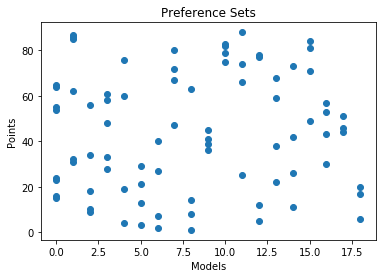

In [81]:
plot_scatter(PS2)

In [82]:
cl2 = j_linkage(PS2)

In [83]:
mod2 = remove_pref_set(cl2)

In [84]:
mod2 = get_model(cl2,correspondences2)

In [85]:
new_mod2 = delete_small_model(mod2, 4)

In [86]:
clusters_2, clusters_size_list2 = define_clusters(new_mod2)
clusters_size2 = len(clusters_2)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list2, clusters_2)))

new_test_model2 = remove_far_distances_clusters(clusters_2, new_mod2,100)

print("Num of clusters previously: {}".format(len(new_mod2)))

clusters_new2, clusters_size_list_new2 = define_clusters(new_test_model2)
clusters_new2, new_test_model2 = merge_cluster(clusters_new2, new_test_model2)
clusters_new2, clusters_size_list_new2 = define_clusters(new_test_model2)

print("Num of clusters currently: {}".format(len(new_test_model2)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new2, clusters_new2)))

Previous dunn index of the cluster : 0.0012479669599288552
Num of clusters previously: 5
Num of clusters currently: 0


ValueError: max() arg is an empty sequence

In [89]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [90]:
img_target = apply_averaging_blur(img_target,(5,5))

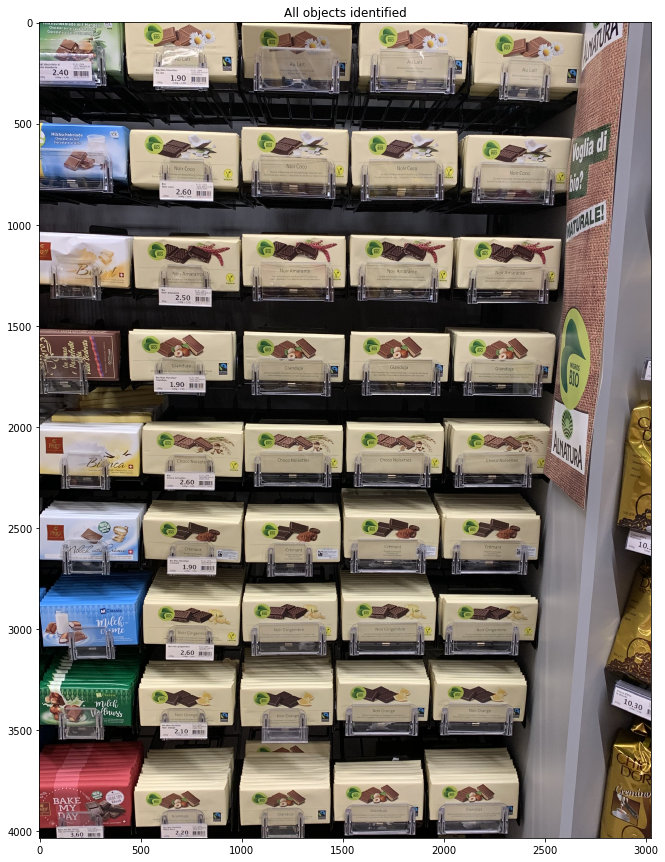

In [91]:
draw_bounding_boxes(img_target, img_template, new_test_model2, 1, True, color=(3, 3, 252))